In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]

In [4]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
election_2012.head()


Barack Obama  Mitt Romney  Other  Total Votes  \
state_po county                                                       
AK       District 1           1518         5899    305         7722   
         District 10          1344         4928    298         6570   
         District 11          2222         6057    352         8631   
         District 12          1901         4300    281         6482   
         District 13          2425         3078    204         5707   

                           Winner  Margin  
state_po county                            
AK       District 1   Mitt Romney    4381  
         District 10  Mitt Romney    3584  
         District 11  Mitt Romney    3835  
         District 12  Mitt Romney    2399  
         District 13  Mitt Romney     653

In [5]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


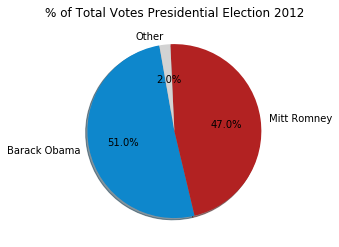

In [6]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [7]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
election_2016.head()



Donald Trump  Hillary Clinton  Other  Total Votes  \
state_po county                                                           
AK       District 1           3180             2573    885         6638   
         District 10          6255             1808    977         9040   
         District 11          6444             2142   1103         9689   
         District 12          6629             1928    986         9543   
         District 13          4028             1684    821         6533   

                            Winner  Margin  
state_po county                             
AK       District 1   Donald Trump     607  
         District 10  Donald Trump    4447  
         District 11  Donald Trump    4302  
         District 12  Donald Trump    4701  
         District 13  Donald Trump    2344

In [8]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

trump_total

62978290

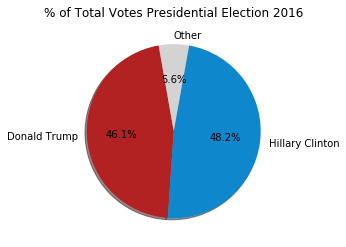

In [9]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [24]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Show results
election_df.head(10)

Barack Obama  Mitt Romney  Other_2012  Total Votes_2012  \
state_po county                                                                 
AK       District 1           1518         5899         305              7722   
         District 10          1344         4928         298              6570   
         District 11          2222         6057         352              8631   
         District 12          1901         4300         281              6482   
         District 13          2425         3078         204              5707   
         District 14          3340         3453         275              7068   
         District 15          3283         2875         293              6451   
         District 16          4013         2876         292              7181   
         District 17          2853         1542         194              4589   
         District 18          4247         2369         314              6930   

                       Winner_2012  Margin_2012  Donald Trump  \
state_po county                                                 
AK       District 1    Mitt Romney         4381          3180   
         District 10   Mitt Romney         3584          6255   
         District 11   Mitt Romney         3835          6444   
         District 12   Mitt Romney         2399          6629   
         District 13   Mitt Romney          653          4028   
         District 14   Mitt Romney          113          5978   
         District 15  Barack Obama          408          2525   
         District 16  Barack Obama         1137          3203   
         District 17  Barack Obama         1311          2618   
         District 18  Barack Obama         1878          2684   

                      Hillary Clinton  Other_2016  Total Votes_2016  \
state_po county                                                       
AK       District 1              2573         885              6638   
         District 10             1808         977              9040   
         District 11             2142        1103              9689   
         District 12             1928         986              9543   
         District 13             1684         821              6533   
         District 14             3043        1399             10420   
         District 15             1828         629              4982   
         District 16             3294         939              7436   
         District 17             3290         880              6788   
         District 18             3909         809              7402   

                          Winner_2016  Margin_2016  
state_po county                                     
AK       District 1      Donald Trump          607  
         District 10     Donald Trump         4447  
         District 11     Donald Trump         4302  
         District 12     Donald Trump         4701  
         District 13     Donald Trump         2344  
         District 14     Donald Trump         2935  
         District 15     Donald Trump          697  
         District 16  Hillary Clinton           91  
         District 17  Hillary Clinton          672  
         District 18  Hillary Clinton         1225

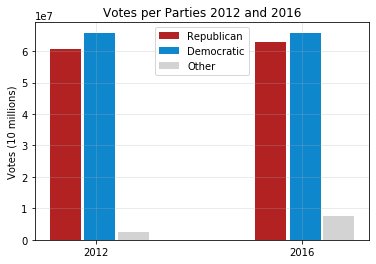

In [12]:

republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [25]:
Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

In [44]:
rep_dem_df = election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")]
rep_dem_df.describe()
dem_rep_df = election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")]
dem_rep_df.describe()

,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Margin_2012,Donald Trump,Hillary Clinton,Other_2016,Total Votes_2016,Margin_2016,Total_Votes_Percent_Change
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,18061.268722,15554.013216,1124.484581,34739.766520,2507.255507,18381.647577,15534.726872,1972.114537,35888.488987,2846.920705,0.043128
std,32810.677462,28992.054773,4009.362497,64566.472766,4646.218734,35795.167046,31671.184747,3092.809771,70316.525903,5685.515700,7.114535
min,439.000000,314.000000,6.000000,761.000000,3.000000,368.000000,353.000000,8.000000,767.000000,15.000000,-22.770000
25%,3617.500000,3289.000000,105.000000,7212.500000,329.500000,3815.500000,2681.000000,345.500000,7312.000000,577.500000,-3.260000
50%,8106.000000,6556.000000,293.000000,15770.000000,956.000000,7958.000000,6305.000000,1007.000000,15627.000000,1386.000000,-0.480000
75%,17186.000000,14675.000000,918.500000,33258.000000,2871.500000,17637.000000,13822.500000,2324.000000,33433.500000,2911.000000,2.935000
max,287519.000000,243258.000000,55481.000000,586258.000000,44261.000000,350570.000000,303951.000000,26733.000000,681254.000000,48348.000000,66.210000


In [28]:
election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")]

Barack Obama  Mitt Romney  Other_2012  \
state_po county                                                
AK       District 15           3283         2875         293   
         District 31           4679         4219         437   
         District 32           5930         3095         503   
         District 36           3341         1386         245   
AL       Barbour               5912         5550          47   
         Conecuh               3555         3439          28   
AR       Woodruff              1340         1227         118   
CO       Chaffee               5086         5070         306   
         Conejos               2213         1835          53   
         Huerfano              1953         1646         115   
         Las Animas            3445         3263         154   
         Pueblo               42551        31894        1749   
CT       Windham              25957        19768         769   
DE       Kent                 35527        32135        1034   
FL       Jefferson             3945         3808          55   
         Monroe               19404        19234         419   
         Pinellas            239104       213258        5340   
         St. Lucie            65869        56202         956   
GA       Baker                  794          785          10   
         Dooly                 2285         1985          28   
         Early                 2765         2557          31   
         Peach                 6148         5287          81   
         Quitman                612          510           6   
         Twiggs                2270         1907          25   
IA       Allamakee             3553         3264         117   
         Boone                 7512         6556         320   
         Bremer                6763         6405         178   
         Buchanan              5911         4450         174   
         Cedar                 4972         4529         148   
         Cerro Gordo          13316        10128         380   
...                             ...          ...         ...   
VA       Westmoreland          4295         3731          94   
VT       Essex                 1539         1164          95   
WA       Clallam              18580        18437        1049   
         Cowlitz              22726        20746        1148   
         Grays Harbor         15960        11914         810   
         Mason                14764        12761         710   
         Pacific               5711         4499         314   
WI       Adams                 5542         4644         101   
         Buffalo               3570         3364         105   
         Columbia             17175        13026         345   
         Crawford              4629         3067         121   
         Door                  9357         8121         193   
         Dunn                 11316        10224         452   
         Forest                2425         2172          51   
         Grant                13594        10255         399   
         Jackson               5298         3900         115   
         Juneau                6242         5411         174   
         Kenosha              44867        34977        1053   
         Lafayette             4536         3314         102   
         Lincoln               7563         7455         198   
         Marquette             4014         3992          99   
         Pepin                 1876         1794          29   
         Price                 3887         3884         130   
         Racine               53008        49347        1009   
         Richland              4969         3573         113   
         Sauk                 18736        12838         353   
         Sawyer                4486         4442          97   
         Trempealeau           7605         5707         169   
         Vernon                8044         5942         283   
         Winnebago            45449        42122       

In [36]:
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

In [38]:
election_df.describe()

,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Margin_2012,Donald Trump,Hillary Clinton,Other_2016,Total Votes_2016,Margin_2016,Total_Votes_Percent_Change
count,3.149000e+03,3149.000000,3149.000000,3.149000e+03,3.149000e+03,3149.000000,3.149000e+03,3149.000000,3.149000e+03,3.149000e+03,3149.000000
mean,2.087560e+04,19261.604954,834.616069,4.097182e+04,1.007506e+04,19999.456970,2.090832e+04,2436.293426,4.334407e+04,1.210735e+04,3.155300
std,7.363943e+04,44361.388665,2934.110532,1.163329e+05,4.127307e+04,42960.520372,8.010525e+04,7471.710363,1.251048e+05,4.886121e+04,6.930254
min,5.000000e+00,54.000000,0.000000,6.400000e+01,1.000000e+00,58.000000,4.000000e+00,3.000000,6.500000e+01,8.000000e+00,-42.170000
25%,1.572000e+03,2921.000000,76.000000,4.871000e+03,1.052000e+03,3214.000000,1.186000e+03,185.000000,4.982000e+03,1.583000e+03,-0.800000
50%,3.959000e+03,6294.000000,184.000000,1.057200e+04,2.545000e+03,7067.000000,3.170000e+03,512.000000,1.089400e+04,3.755000e+03,3.040000
75%,1.125900e+04,16032.000000,517.000000,2.814200e+04,6.469000e+03,17639.000000,9.654000e+03,1628.000000,2.947200e+04,8.517000e+03,6.810000
max,2.216903e+06,885333.000000,78831.000000,3.181067e+06,1.331570e+06,769743.000000,2.464364e+06,200201.000000,3.434308e+06,1.694621e+06,66.210000
